In [1]:
import os
import pandas as pd
import lipd
import requests
import json
from collections import defaultdict
import re
from matplotlib import pyplot as plt

In [42]:
# for root, d_names, f_names in os.walk(path):
# #     print(root, d_names, f_names)
#     for file_name in f_names:
#         final_name = root + '\\' + '161_976.Martrat.2014.lpd'
# #         final_name = os.path.join(root, file_name)
# #         print(final_name)
#         d= lipd.readLipd(final_name)
#         print(d)
#         break
d = lipd.readLipd(r'D:\\annotating_paleoclimate_data\\PalMod1_0_1\\GeoB1720_2.lpd')
print(d)
path = d['paleoData']['paleo0']['measurementTable']['paleo0measurement0']['columns']
archive = d['archiveType']
print('archive: ', archive)
for key in path.keys() :
    if 'variableName' in path[key].keys():
        vname = path[key]['variableName']
        print(vname)
        break

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GeoB1720_2.lpd
Finished read: 1 record
{'createdBy': 'PalMod2LiPD', 'dataSetName': 'GeoB1720_2', 'archiveType': 'marine sediment', 'geo': {'geometry': {'coordinates': [13.8348, -28.9937, -1997]}, 'notes': 'NA', 'siteName': 'GeoB1720_2'}, 'paleoData': OrderedDict([('paleo0', OrderedDict([('measurementTable', OrderedDict([('paleo0measurement0', {'tableName': 'paleo0measurement0', 'columns': OrderedDict([('depth_merged', {'variableName': 'depth_merged', 'units': 'm', 'number': 1, 'TSid': 'R2rlo5qetNF', 'values': [0.005, 0.035, 0.065, 0.095, 0.125, 0.155, 0.185, 0.215, 0.245, 0.275, 0.305, 0.335, 0.365, 0.395, 0.425, 0.455, 0.485, 0.515, 0.545, 0.575, 0.605, 0.635, 0.665, 0.695, 0.725, 0.755, 0.785, 0.815, 0.845, 0.875, 0.905, 0.935, 0.965, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.36, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1

****From The Proxy Ontology - Named Individuals****

In [43]:
named_individuals = 'Al/Ca  Ar-Ar  B/Ca  Ba/Ca  C  Clay fraction  Color  d13C  d15N  d170  d180  d34S  dD  Density  Diffuse spectral reflectance  Faunal  Fe/Ca  Floral  Grain size  Historic  Layer thickness  Lead Isotope  Li/Ca  Lithics  Luminescence  Magnetic susceptibility  Mg/Ca  Mineral matter  Mn/Ca  Moisture Content  N  Neodymium  Organic matter  P  Permeability  Porosity  Radiocarbon  Resistivity  Sand fraction  Si  Silt fraction  Sr/Ca  TEX86  U-Th  Uk37\'  Uk37  X-Ray diffraction  X-ray fluorescence  Zn/Ca'
named_individuals = set(named_individuals.split('  '))
print(named_individuals)
print(len(named_individuals))

{'Grain size', 'Permeability', 'Si', 'Li/Ca', 'Magnetic susceptibility', 'd180', 'P', 'Color', 'Layer thickness', 'X-Ray diffraction', 'U-Th', 'Sand fraction', 'Sr/Ca', 'dD', 'Fe/Ca', 'Resistivity', 'd34S', 'Porosity', 'Zn/Ca', 'Mn/Ca', 'Al/Ca', 'd15N', "Uk37'", 'Diffuse spectral reflectance', 'Faunal', 'Radiocarbon', 'Neodymium', 'Density', 'Mg/Ca', 'TEX86', 'Ba/Ca', 'Lead Isotope', 'Mineral matter', 'Luminescence', 'X-ray fluorescence', 'Clay fraction', 'Ar-Ar', 'd13C', 'Silt fraction', 'Lithics', 'B/Ca', 'N', 'd170', 'Floral', 'Historic', 'Organic matter', 'C', 'Uk37', 'Moisture Content'}
49


****The LinkedEarth Wiki Queries Data - Archives, Proxy observation type, Proxy Sensor Type****

In [44]:
q_archives = 'marine sediment  coral  lake sediment  glacier ice  tree  documents  speleothem  sclerosponge  borehole  hybrid  bivalve  Rock  Sclerosponge  Speleothem  Wood  Coral  MarineSediment  LakeSediment  GlacierIce  Documents  Hybrid  MolluskShell  Lake'
q_proxy_obs = '''DiffuseSpectralReflectance
*JulianDay
*Al/Ca
*B/Ca
*Ba/Ca
*Mn/Ca
*Sr/Ca
*Zn/Ca
*Radiocarbon
*D18O
*Mg/Ca
*TEX86
*TRW
*Dust
*Chloride
*Sulfate
*Nitrate
*D13C
*Depth
*Age
*Mg
*Floral
*DD
*C
*N
*P
*Si
*Uk37
*Uk37Prime
*Density
*GhostMeasured
*Trsgi
*Mg Ca
*SampleCount
*Segment
*RingWidth
*Residual
*ARS
*Corrs
*RBar
*SD
*SE
*EPS
*Core
*Uk37prime
*Upper95
*Lower95
*Year old
*Thickness
*Na
*DeltaDensity
*Reflectance
*BlueIntensity
*VarveThickness
*Reconstructed
*AgeMin
*AgeMax
*SampleID
*Depth top
*Depth bottom
*R650 700
*R570 630
*R660 670
*RABD660 670
*WaterContent
*C N
*BSi
*MXD
*EffectiveMoisture
*Pollen
*Precipitation
*Unnamed
*Sr Ca
*Calcification1
*Calcification2
*Calcification3
*CalcificationRate
*Composite
*Calcification4
*Notes
*Notes1
*Calcification5
*Calcification
*Calcification6
*Calcification7
*Trsgi1
*Trsgi2
*Trsgi3
*Trsgi4
*IceAccumulation
*F
*Cl
*Ammonium
*K
*Ca
*Duration
*Hindex
*VarveProperty
*X radiograph dark layer
*D18O1
*SedAccumulation
*Massacum
*Melt
*SampleDensity
*37:2AlkenoneConcentration
*AlkenoneConcentration
*AlkenoneAbundance
*BIT
*238U
*Distance
*232Th
*230Th/232Th
*D234U
*230Th/238U
*230Th Age uncorrected
*230Th Age corrected
*D234U initial
*TotalOrganicCarbon
*CDGT
*C/N
*CaCO3
*PollenCount
*Weight
*DryBulkDensity
*37:3AlkenoneConcentration
*Min sample
*Max sample
*Age uncertainty
*Is date used original model
*238U content
*238U uncertainty
*232Th content
*232Th uncertainty
*230Th 232Th ratio
*230Th 232Th ratio uncertainty
*230Th 238U activity
*230Th 238U activity uncertainty
*Decay constants used
*Corrected age
*Corrected age unceratainty
*Modern reference
*Al
*S
*Ti
*Mn
*Fe
*Rb
*Sr
*Zr
*Ag
*Sn
*Te
*Ba
*NumberOfObservations
*Diffuse spectral reflectance
*Total Organic Carbon
*BSiO2
*CalciumCarbonate
*WetBulkDensity'''
q_proxy_obs = q_proxy_obs.split('\n*')
print(q_proxy_obs)

q_proxy_sensor = '''Genus: Siderastrea Species: Siderastrea siderea
*Genus: Siderastrea Species: siderea
*Genus: Siderastrea Species: Siderastrea radians
*Genus: Globigerinoides Species: ruber
*Genus: Globigerinoides Species: sacculifer
*Genus: Ceratoporella Species: nicholsoni
*Genus: Ceratoporella Species: Ceratoporella nicholsoni
*Genus: Diploria Species: labyrinthiformis
*Genus: Diploria Species: Diploria labyrinthiformis
*Genus: Diploria Species: Diploria strigosa
*Genus: Porites Species: lutea
*Genus: Porites Species: Porites austraiensis
*Genus: Porites Species: NA
*Genus: Porites Species: Porites
*Genus: Porites Species: Porites sp.
*Genus: Porites Species: Porites lobata
*Genus: Porites Species: Porites lutea
*Genus: Porites Species: NaN
*Genus: Porites Species: P. australiensis, possibly P. lobata
*Genus: Porites Species: Porites australiensis
*Genus: Porites Species: lobata
*Genus: Cibicidoides Species: mundulus
*Genus: Cibicidoides Species: wuellerstorfi
*Genus: Cibicidoides Species: mabahethi
*Genus: Platygyra Species: lamellina
*Genus: Neogloboquadrina Species: dutertrei
*Genus: Neogloboquadrina Species: pachyderma
*Genus: Uvigerina Species: senticosa
*Genus: Uvigerina Species: peregrina
*Genus: Uvigerina Species: auberiana
*Genus: Montastrea Species: faveolata
*Genus: Montastraea Species: Montastraea faveolata
*Genus: Solenastrea Species: bournoni
*Genus: Arctica Species: islandica
*Genus: Diploastrea Species: NA
*Genus: Diploastrea Species: heliopora
*Genus: Hydnophora, Porites Species: Hydnophora microconos, Porites lobata
*Genus: Pavona Species: Pavona clavus, Pavona gigantea
*Genus: Pulleniatina Species: obliquiloculata
*Genus: Globigerina Species: bulloides
*Genus: Globogerina Species: bulloides
*Genus: Uvigirina Species: peregrina
*Genus: Nonionella Species: stella
*Genus: Nonionellina Species: labradorica
*Genus: Globorotalia Species: inflata
*Genus: Cibicides Species: wuellerstorfi
*Genus: Creseis Species: acicula
*Genus: Limacina Species: inflata
*Genus: Bulimina Species: marginata
*Genus: Actinocyclus Species: curvatulus
*Genus: Azpeitia Species: nodulifer
*Genus: Azpeitia Species: tabularis
*Genus: Coscinodiscus Species: radiatus
*Genus: Hemidiscus Species: cuneiformis
*Genus: Neodenticula Species: seminae
*Genus: Nitzschia Species: interruptestriata
*Genus: Pseudoeunotia Species: doliolus
*Genus: Roperia Species: tesselata
*Genus: Thalassionema Species: nitzschioides
*Genus: Thalassiosira Species: eccentrica
*Genus: Thalassiosira Species: oestrupii
*Genus: Thalassiosira Species: pacifica
*Genus: Thalassiothrix Species: longissima
*Genus: Paralia Species: sulcata'''
q_proxy_sensor = q_proxy_sensor.split('\n*')
# print(q_proxy_sensor)
q_proxy_sensor_set = set()
for s in q_proxy_sensor:
    s = s.split('Species: ')
    q_proxy_sensor_set.add(s[1])    
print(q_proxy_sensor_set)

['DiffuseSpectralReflectance', 'JulianDay', 'Al/Ca', 'B/Ca', 'Ba/Ca', 'Mn/Ca', 'Sr/Ca', 'Zn/Ca', 'Radiocarbon', 'D18O', 'Mg/Ca', 'TEX86', 'TRW', 'Dust', 'Chloride', 'Sulfate', 'Nitrate', 'D13C', 'Depth', 'Age', 'Mg', 'Floral', 'DD', 'C', 'N', 'P', 'Si', 'Uk37', 'Uk37Prime', 'Density', 'GhostMeasured', 'Trsgi', 'Mg Ca', 'SampleCount', 'Segment', 'RingWidth', 'Residual', 'ARS', 'Corrs', 'RBar', 'SD', 'SE', 'EPS', 'Core', 'Uk37prime', 'Upper95', 'Lower95', 'Year old', 'Thickness', 'Na', 'DeltaDensity', 'Reflectance', 'BlueIntensity', 'VarveThickness', 'Reconstructed', 'AgeMin', 'AgeMax', 'SampleID', 'Depth top', 'Depth bottom', 'R650 700', 'R570 630', 'R660 670', 'RABD660 670', 'WaterContent', 'C N', 'BSi', 'MXD', 'EffectiveMoisture', 'Pollen', 'Precipitation', 'Unnamed', 'Sr Ca', 'Calcification1', 'Calcification2', 'Calcification3', 'CalcificationRate', 'Composite', 'Calcification4', 'Notes', 'Notes1', 'Calcification5', 'Calcification', 'Calcification6', 'Calcification7', 'Trsgi1', 'Trsg

****Getting Perioidic Table elements from API****

In [45]:
response = requests.get('https://neelpatel05.pythonanywhere.com')
response = json.loads(response.text)
print(response)

[{'atomicMass': '1.00794(4)', 'atomicNumber': 1, 'atomicRadius': 37, 'boilingPoint': 20, 'bondingType': 'diatomic', 'cpkHexColor': 'FFFFFF', 'density': 8.99e-05, 'electronAffinity': -73, 'electronegativity': 2.2, 'electronicConfiguration': '1s1', 'groupBlock': 'nonmetal', 'ionRadius': '', 'ionizationEnergy': 1312, 'meltingPoint': 14, 'name': 'Hydrogen', 'oxidationStates': '-1, 1', 'standardState': 'gas', 'symbol': 'H', 'vanDelWaalsRadius': 120, 'yearDiscovered': 1766}, {'atomicMass': '4.002602(2)', 'atomicNumber': 2, 'atomicRadius': 32, 'boilingPoint': 4, 'bondingType': 'atomic', 'cpkHexColor': 'D9FFFF', 'density': 0.0001785, 'electronAffinity': 0, 'electronegativity': '', 'electronicConfiguration': '1s2', 'groupBlock': 'noble gas', 'ionRadius': '', 'ionizationEnergy': 2372, 'meltingPoint': '', 'name': 'Helium', 'oxidationStates': '', 'standardState': 'gas', 'symbol': 'He', 'vanDelWaalsRadius': 140, 'yearDiscovered': 1868}, {'atomicMass': '6.941(2)', 'atomicNumber': 3, 'atomicRadius': 

In [46]:
periodic_table_elements = [res['symbol'] for res in response]
print(periodic_table_elements)
len(periodic_table_elements)
# for res in response:
#     print(res)
periodic_table_name = [res['name'] for res in response]
print(periodic_table_name)

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']
['Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon', 'Nitrogen', 'Oxygen', 'Fluorine', 'Neon', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Phosphorus', 'Sulfur', 'Chlorine', 'Argon', 'Potassium', 'Calcium', 'Scandium', 'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron', 'Cobalt', 'Ni

In [47]:
archives_map = {}
archives = 'coral  speleothem  sclerosponge  hybrid  Sclerosponge  Speleothem  Coral MarineSediment  LakeSediment  GlacierIce  Documents  Hybrid  MolluskShell  Lake'
archives_map['marine sediment'] = 'MarineSediment'
archives_map['lake sediment'] = 'LakeSediment'
archives_map['glacier ice'] = 'GlacierIce'
archives_map['documents'] = 'Documents'
archives_map['borehole'] = 'Rock'
archives_map['tree'] = 'Wood'
archives_map['bivalve'] = 'MollusckShell'
for ar in archives.split(' '):
    if ar.islower():
        archives_map[ar] = ar.title()
    else:
        archives_map[ar] = ar
print(archives_map)



{'marine sediment': 'MarineSediment', 'lake sediment': 'LakeSediment', 'glacier ice': 'GlacierIce', 'documents': 'Documents', 'borehole': 'Rock', 'tree': 'Wood', 'bivalve': 'MollusckShell', 'coral': 'Coral', '': '', 'speleothem': 'Speleothem', 'sclerosponge': 'Sclerosponge', 'hybrid': 'Hybrid', 'Sclerosponge': 'Sclerosponge', 'Speleothem': 'Speleothem', 'Coral': 'Coral', 'MarineSediment': 'MarineSediment', 'LakeSediment': 'LakeSediment', 'GlacierIce': 'GlacierIce', 'Documents': 'Documents', 'Hybrid': 'Hybrid', 'MolluskShell': 'MolluskShell', 'Lake': 'Lake'}


****Matching LinkedEarth Wiki Queries data with LinkedEarth Ontology - PROXY OBSERVATION****

In [48]:
proxy_obs_map = {}
proxy_obs_map['Calcification'] = 'Calcification'
proxy_obs_map['Trsgi'] = 'Trsgi'
proxy_obs_map['C37.concentration'] = '37:2AlkenoneConcentration'
proxy_obs_map['trsgi'] = 'Trsgi'
proxy_obs_map['d-excess'] = 'deuteriumExcess'
proxy_obs_map['deuteriumExcess'] = 'deuteriumExcess'
proxy_obs_map['d2H'] = 'dD'
proxy_obs_map['dD'] = 'dD'
proxy_obs_map['d18o'] = 'd18O'
unknown_proxy = set()
print('length of q_proxy_obs', len(q_proxy_obs))
for proxy in q_proxy_obs:
    m = re.search(r'^\D+', proxy)
    if len(proxy) <= 2:
        if proxy in periodic_table_elements:
            proxy_obs_map[proxy] = proxy
        else:
            unknown_proxy.add(proxy)
    elif '/' in proxy:
        s = proxy.split('/')
        if (s[1] == 'Ca' or s[1] == 'N') and s[0] in periodic_table_elements:
            proxy_obs_map[proxy] = proxy
        elif 'U' in s[0] and 'U' in s[1] or 'Th' in s[0] and 'Th' in s[1]:
            proxy_obs_map[proxy] = proxy
        else:
            unknown_proxy.add(proxy)
    elif m and m.group() in proxy_obs_map:
            proxy_obs_map[proxy] = m.group()
    elif proxy.startswith('D') or proxy.startswith('d'):
        if proxy.isalpha():
            proxy_obs_map[proxy] = proxy
        else:
            proxyl = str('d' + proxy[1:])
            if proxyl in named_individuals:
                proxy_obs_map[proxy] = proxyl
                proxy_obs_map[proxyl] = proxyl
            else:
                proxy_obs_map[proxy] = proxyl
                proxy_obs_map[proxyl] = proxyl
                unknown_proxy.add(proxy)
            
    elif ' ' in proxy:
        s = proxy.split(' ')
        if len(s) > 2:
            proxy_obs_map[proxy] = proxy
        elif len(s[1]) > 2:
            proxy_obs_map[proxy] = proxy
        else:
            num = s[0].title()
            den = s[1].title()
            if den in periodic_table_elements and str(num + '/' + den) in q_proxy_obs:
                proxy_obs_map[proxy] = str(num + '/' + den)
    elif 'prime' in proxy or 'Prime' in proxy:
        if 'prime' in proxy:
            s = proxy.split('prime')
        else:
            s = proxy.split('Prime')
        if s[0] in named_individuals:
            proxy_obs_map[proxy] = str(s[0] + "\'")
    elif proxy.lower() in named_individuals or proxy in named_individuals:
        proxy_obs_map[proxy] = proxy if proxy in named_individuals else proxy.lower()
    else:  
        proxy_obs_map[proxy] = proxy
        unknown_proxy.add(proxy)

print(proxy_obs_map)
print(len(proxy_obs_map))
print('UNKNOWN PROXY')
print(unknown_proxy)
print('VALUES IN UNKNOWN PROXY AND NOT IN PROXY OBS MAP')
print(unknown_proxy.difference(set(proxy_obs_map.keys())))
print('VALUES FROM QUERIES LINKED EARTH WIKI FOR PROXY OBS TYPE AND NOT IN PROXY OBS MAP')
print(set(q_proxy_obs).difference(set(proxy_obs_map.keys())))
print('VALUES IN QUERIES LINKED EARTH WIKI FOR PROXY OBS TYPE AND NOT IN UNKNOWN PROXY')
print(set(q_proxy_obs).difference(unknown_proxy))

length of q_proxy_obs 159
{'Calcification': 'Calcification', 'Trsgi': 'Trsgi', 'C37.concentration': '37:2AlkenoneConcentration', 'trsgi': 'Trsgi', 'd-excess': 'deuteriumExcess', 'deuteriumExcess': 'deuteriumExcess', 'd2H': 'dD', 'dD': 'dD', 'd18o': 'd18O', 'DiffuseSpectralReflectance': 'DiffuseSpectralReflectance', 'JulianDay': 'JulianDay', 'Al/Ca': 'Al/Ca', 'B/Ca': 'B/Ca', 'Ba/Ca': 'Ba/Ca', 'Mn/Ca': 'Mn/Ca', 'Sr/Ca': 'Sr/Ca', 'Zn/Ca': 'Zn/Ca', 'Radiocarbon': 'Radiocarbon', 'D18O': 'd18O', 'd18O': 'd18O', 'Mg/Ca': 'Mg/Ca', 'TEX86': 'TEX86', 'TRW': 'TRW', 'Dust': 'Dust', 'Chloride': 'Chloride', 'Sulfate': 'Sulfate', 'Nitrate': 'Nitrate', 'D13C': 'd13C', 'd13C': 'd13C', 'Depth': 'Depth', 'Age': 'Age', 'Mg': 'Mg', 'Floral': 'Floral', 'C': 'C', 'N': 'N', 'P': 'P', 'Si': 'Si', 'Uk37': 'Uk37', 'Uk37Prime': "Uk37'", 'Density': 'Density', 'GhostMeasured': 'GhostMeasured', 'Mg Ca': 'Mg/Ca', 'SampleCount': 'SampleCount', 'Segment': 'Segment', 'RingWidth': 'RingWidth', 'Residual': 'Residual', 'AR

In [49]:
q_inferred_var = '''Year
*Radiocarbon Age
*D18O
*Sea Surface Temperature
*Age
*Temperature
*Salinity
*Uncertainty temperature
*Temperature1
*Temperature2
*Temperature3
*Uncertainty temperature1
*Thermocline Temperature
*Sedimentation Rate
*Relative Sea Level
*Sea Surface Salinity
*Subsurface Temperature
*Accumulation rate
*Carbonate Ion Concentration
*Mean Accumulation Rate
*Accumulation rate, total organic carbon
*Accumulation rate, calcium carbonate'''
q_inferred_var = q_inferred_var.split('\n*')
q_inferred_var.sort()
q_inferred_var

['Accumulation rate',
 'Accumulation rate, calcium carbonate',
 'Accumulation rate, total organic carbon',
 'Age',
 'Carbonate Ion Concentration',
 'D18O',
 'Mean Accumulation Rate',
 'Radiocarbon Age',
 'Relative Sea Level',
 'Salinity',
 'Sea Surface Salinity',
 'Sea Surface Temperature',
 'Sedimentation Rate',
 'Subsurface Temperature',
 'Temperature',
 'Temperature1',
 'Temperature2',
 'Temperature3',
 'Thermocline Temperature',
 'Uncertainty temperature',
 'Uncertainty temperature1',
 'Year']

In [50]:
inf_named_individuals = '''Age  Arctic Oscillation (AO, AAO)  Atlantic Multi-decadal Oscillation (AMO)  Bottom water temperature  Carbon dioxide concentration  Carbonate ion concentration  Carbonate saturation  d180  DD  Deuterium excess (excessD)  Free oxygen levels  Julian day  Methane concentration  Moisture content  Nino 1  Nino 1+2  Nino 2  Nino 3  Nino 3.4  Nino 4  Nitrous oxide concentration  North Atlantic Oscillation (NAO)  Ocean mixed layer temperature  Palmer Drought Index  Palmer Drought Severity Index (PDSI)  PH  Precipitation amount  Radiocarbon age  Salinity  Sea surface temperature  Southern Annular Mode (SAM)  Southern oscillation index (SOI)  Surface air temperature  Temperature  Year'''
inf_named_individuals = inf_named_individuals.split('  ')
inf_named_individuals

['Age',
 'Arctic Oscillation (AO, AAO)',
 'Atlantic Multi-decadal Oscillation (AMO)',
 'Bottom water temperature',
 'Carbon dioxide concentration',
 'Carbonate ion concentration',
 'Carbonate saturation',
 'd180',
 'DD',
 'Deuterium excess (excessD)',
 'Free oxygen levels',
 'Julian day',
 'Methane concentration',
 'Moisture content',
 'Nino 1',
 'Nino 1+2',
 'Nino 2',
 'Nino 3',
 'Nino 3.4',
 'Nino 4',
 'Nitrous oxide concentration',
 'North Atlantic Oscillation (NAO)',
 'Ocean mixed layer temperature',
 'Palmer Drought Index',
 'Palmer Drought Severity Index (PDSI)',
 'PH',
 'Precipitation amount',
 'Radiocarbon age',
 'Salinity',
 'Sea surface temperature',
 'Southern Annular Mode (SAM)',
 'Southern oscillation index (SOI)',
 'Surface air temperature',
 'Temperature',
 'Year']

In [51]:
inf_var_map = {}
inf_var_map['Temperature'] = 'Temperature'
inf_var_map['d18O'] = 'd18O'
for inf_var in q_inferred_var:
    m = re.search(r'^\D+', inf_var)
    if m and m.group() in inf_var_map:
        inf_var_map[inf_var] = m.group()
    elif inf_var == 'D18O':
        inf_var_map[inf_var] = 'd18O'
    elif inf_var.title() in inf_named_individuals or inf_var in inf_named_individuals:
        inf_var_map[inf_var] = inf_var.title()
        inf_var_map[inf_var.title()] = inf_var.title()
    else:
        inf_var_map[inf_var] = inf_var
print(inf_var_map)
print(len(inf_var_map))        
    
for inf_ni in inf_named_individuals:
    if inf_ni not in inf_var_map and inf_ni.title() not in inf_var_map:
        if '(' in inf_ni:
            before = inf_ni[:inf_ni.index('(')].title()
            inf_var_map[inf_ni] = before + inf_ni[inf_ni.index('(') : ]
        else:
            inf_var_map[inf_ni] = inf_ni.title()
print(inf_var_map)
print(len(inf_var_map))        

{'Temperature': 'Temperature', 'd18O': 'd18O', 'Accumulation rate': 'Accumulation rate', 'Accumulation rate, calcium carbonate': 'Accumulation rate, calcium carbonate', 'Accumulation rate, total organic carbon': 'Accumulation rate, total organic carbon', 'Age': 'Age', 'Carbonate Ion Concentration': 'Carbonate Ion Concentration', 'D18O': 'd18O', 'Mean Accumulation Rate': 'Mean Accumulation Rate', 'Radiocarbon Age': 'Radiocarbon Age', 'Relative Sea Level': 'Relative Sea Level', 'Salinity': 'Salinity', 'Sea Surface Salinity': 'Sea Surface Salinity', 'Sea Surface Temperature': 'Sea Surface Temperature', 'Sedimentation Rate': 'Sedimentation Rate', 'Subsurface Temperature': 'Subsurface Temperature', 'Temperature1': 'Temperature', 'Temperature2': 'Temperature', 'Temperature3': 'Temperature', 'Thermocline Temperature': 'Thermocline Temperature', 'Uncertainty temperature': 'Uncertainty temperature', 'Uncertainty temperature1': 'Uncertainty temperature', 'Year': 'Year'}
23
{'Temperature': 'Tempe

In [52]:
master_table = pd.DataFrame(columns = ['dataset name', 'compilation name', 'archiveType', 'predicted archiveType', 'TSid', 'variableType', 'variableName', 'predicted proxyObsType', 'remainder(variableName)', 'proxyObservationType','final proxyValue','proxyValue from', 'units', 'hasProxySystem', 'ProxySystem.SensorType', 'interpretation/variable','interpretation/variableDetail'])
master_table_inferred = pd.DataFrame(columns = ['dataset name', 'compilation name', 'archiveType', 'predicted archiveType', 'TSid', 'variableType', 'variableName','predicted Inf Var Type', 'remainder(variableName)', 'inferred Var Type', 'final Inf Var Type', 'inf Var from', 'units', 'interpretation/variable', 'interpretation/variableDetail'])
flagged_lipd_file = defaultdict(set)
master_table_flagged_tsid = pd.DataFrame(columns = ['TSid', 'Dataset Name', 'Compilation Name', 'variableName', 'Conflict with'])

In [53]:
root = 'D:\\annotating_paleoclimate_data\\Temp12k1_0_1'
print(root.split('\\')[2])

Temp12k1_0_1


In [54]:
def predict_inf_var_type_from_variable_name(vname):
    pred, rem = 'NA', 'NA'
    if vname in inf_var_map or vname.title() in inf_var_map:
        pred = vname.title()
    else:
        for i in range(len(vname)):
            if vname[:i] in inf_var_map:
                pred = vname[:i]
                rem = vname[i:]
                break
            elif vname[i:] in inf_var_map:
                pred = vname[i:]
                rem = vname[:i]
                break
    return pred, rem

In [55]:
def predict_proxy_obs_type_from_variable_name(vname):
    pred, rem = 'NA', 'NA'
    if vname in proxy_obs_map:
        pred = proxy_obs_map[vname]
    elif vname.title() in proxy_obs_map:
        pred = proxy_obs_map[vname.title()]    
    elif vname.isupper():
        pass
    elif '\'' in vname:
        pred = vname
    elif 'bubbleNumberDensity' in vname:
        proxy_obs_map[vname] = vname 
        pred = vname
    elif vname in periodic_table_name:
        pred = vname
    elif '_' in vname:
        if 'Ca' in vname or 'N' in vname:
            vname = vname.replace('_', '/')
            pred = proxy_obs_map.get(vname, 'NA')
        else:
            vname = vname.replace('_', ' ')
            pred = proxy_obs_map.get(vname, 'NA')
    else:
        for i in range(len(vname)):
            if vname[:i] in proxy_obs_map:
                pred = vname[:i]
                rem = vname[i:]
                break
            elif vname[i:] in proxy_obs_map:
                pred = vname[i:]
                rem = vname[:i]
                break
        if pred == 'Ca' and len(rem) > 2:
            possible_proxy = rem[-2:] + '/' + pred
            if possible_proxy in proxy_obs_map:
                pred = possible_proxy
                rem = rem[:-2]
    return pred, rem

In [56]:
def readLipd(path, csv_file_name):
    global master_table, flagged_lipd_file, master_table_flagged_tsid, master_table_inferred
    
    table = pd.DataFrame(columns = ['dataset name', 'compilation name', 'archiveType', 'predicted archiveType', 'TSid', 'variableType', 'variableName', 'predicted proxyObsType', 'remainder(variableName)' 'proxyObservationType', 'proxyValue from', 'units', 'hasProxySystem', 'ProxySystem.SensorType', 'interpretation/variable','interpretation/variableDetail'])
    for root, d_names, f_names in os.walk(path):
        for file_name in f_names:
             if '.lpd' in file_name:
                final_name = root + '\\' + file_name
                compilation_name = str(root).split('\\')
                d= lipd.readLipd(final_name)
                path = d['paleoData']['paleo0']['measurementTable']['paleo0measurement0']['columns']
                archive = d['archiveType']
                if archive in archives_map:
                    pred_archive = archives_map.get(archive)
                else:
                    archives_map[archive] = archive
                    pred_archive = archive
#                 print('archive: ', archive)
                for key in path.keys() :
                    vname = 'NA'
                    proxyOType = 'NA'
                    unit = 'NA'
                    hasProxySys = 'NA'
                    sensorType = 'NA'
                    intVariable = 'NA'
                    intVarDet = 'NA'
                    vtype = 'NA'
                    tsid = 'NA'
                    pred = 'NA'
                    rem = 'NA'
                    finalp = 'NA'
                    pred_inf_var, rem_inf_var = 'NA', 'NA'
                    inf_var, inf_var_from, final_inf_var = 'NA', 'NA', 'NA'
                    if 'TSid' in path[key].keys():
                        tsid = path[key]['TSid']
                    if 'variableType' in path[key].keys():
                        vtype = path[key]['variableType']
                    if 'variableName' in path[key].keys():
                        vname = path[key]['variableName']
                    if 'units' in path[key].keys() :
                        unit = path[key]['units']
                        unit = unit.replace('_', '/')
                    if 'interpretation' in path[key].keys() :
                        for inter in path[key]['interpretation']:
                            if type(inter) is not str :
                                if 'variable' in inter.keys() :
                                    intVariable = inter['variable']
                                if 'variableDetail' in inter.keys() :
                                    intVarDet = inter['variableDetail']
                    if vtype == 'measured' and (vname != 'age' and vname != 'depth' and vname != 'year'):
                        pred, rem = predict_proxy_obs_type_from_variable_name(vname)
                        if 'proxyObservationType' in path[key].keys() :
                            proxyOType = path[key]['proxyObservationType']
                        if 'hasProxySystem' in path[key].keys() :
                            hasProxySys = path[key]['hasProxySystem']
                        if 'ProxySystem.SensorType' in path[key].keys() :
                            sensorType = path[key]['ProxySystem.SensorType']
                        if proxyOType != 'NA':
                            pfrom = 1
                            finalp = proxy_obs_map.get(proxyOType, proxyOType)
                        elif pred != 'NA':
                            pfrom = 2
                            finalp = pred
                        else:
                            pfrom = 3
                            finalp = vname
                            
                        if vname != 'NA' or unit != 'NA' or proxyOType != 'NA' or intVariable != 'NA' or intVarDet != 'NA' :
                            df = pd.DataFrame({'compilation name':[compilation_name[4]], 'dataset name':[file_name], 'archiveType': [archive], 'predicted archiveType': [pred_archive], 'variableName': [vname], 'variableType':[vtype], 'TSid':[tsid],'predicted proxyObsType':[pred], 'remainder(variableName)':[rem],  'proxyObservationType':[proxyOType],'final proxyValue':[finalp], 'proxyValue from':[pfrom], 'units':[unit],'ProxySystem.SensorType':[sensorType], 'hasProxySystem':[hasProxySys], 'interpretation/variable':[intVariable],'interpretation/variableDetail':[intVarDet]})
                            #print(df)
                            table = table.append(df, ignore_index = True)
                            master_table = master_table.append(df, ignore_index = True)
                    else:
                        pred_inf_var, rem_inf_var = predict_inf_var_type_from_variable_name(vname)
                        if 'inferredVariableType' in path[key].keys() :
                            inf_var = path[key]['inferredVariableType']
                        if inf_var != 'NA':
                            inf_var_from = 1
                            final_inf_var = inf_var_map.get(inf_var, inf_var)
                        elif pred_inf_var != 'NA':
                            inf_var_from = 2
                            final_inf_var = pred_inf_var
                        else:
                            inf_var_from = 3
                            final_inf_var = vname
                        
                        if vname != 'NA' or unit != 'NA' or intVariable != 'NA' or intVarDet != 'NA' :
                            df = pd.DataFrame({'compilation name':[compilation_name[4]], 'dataset name':[file_name], 'archiveType': [archive], 'predicted archiveType': [pred_archive], 'variableName': [vname], 'variableType':[vtype], 'TSid':[tsid],'predicted Inf Var Type':[pred_inf_var], 'remainder(variableName)':[rem_inf_var],  'inferred Var Type':[inf_var],'final Inf Var Type':[final_inf_var], 'inf Var from':[inf_var_from], 'units':[unit], 'interpretation/variable':[intVariable],'interpretation/variableDetail':[intVarDet]})
                            master_table_inferred = master_table_inferred.append(df, ignore_index = True)
                            
                            
                    if tsid != 'NA' or 'vname' != 'NA':
#                         flagged_files_set = flagged_lipd_file[tsid] if len(flagged_lipd_file[tsid]) > 0 else set() 
                        df_m = pd.DataFrame({'TSid' : [tsid], 'Dataset Name' : [file_name], 'Compilation Name' : [compilation_name[4]], 'variableName' : [vname], 'Conflict with' : [flagged_lipd_file.get(tsid, set())]})
                        master_table_flagged_tsid = master_table_flagged_tsid.append(df_m, ignore_index = True)
                        flagged_lipd_file[tsid].add(final_name)
    table_com=table.explode('dataset name').explode('compilation name').explode('archiveType').explode('variableName').explode('proxyObservationType').explode('final proxyValue').explode('proxyValue from').explode('units').explode('hasProxySystem').explode('ProxySystem.SensorType').explode('interpretation/variable').explode('interpretation/variableDetail').reset_index()
#     print(table_com)
    table_com = table_com.drop(columns = ['index'])
    table_com.to_csv(csv_file_name, sep = ',', encoding = 'utf-8',index = False)

In [57]:

readLipd(r'D:\\annotating_paleoclimate_data\\Temp12k1_0_1', r'D:\\annotating_paleoclimate_data\\temp12k.csv')
readLipd(r'D:\\annotating_paleoclimate_data\\iso2k1_0_0', r'D:\\annotating_paleoclimate_data\\iso2k.csv')
readLipd(r'D:\\annotating_paleoclimate_data\\PalMod1_0_1', r'D:\\annotating_paleoclimate_data\\palMod.csv')
readLipd(r'D:\\annotating_paleoclimate_data\\PAGES2kv2', r'D:\\annotating_paleoclimate_data\\PAGES2k.csv')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 117_723A.Godad.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 161_976.Martrat.2014.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 165_1002C.Herbert.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 2005-804-006.Ledu.2010.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 31Lake.Eisner.1995.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 3MPond.Pellatt.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 850Lake.Shemesh.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to stand

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Breitnau-Neuhof.Roesch.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: brurskardstjorni.Velle.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: BS79_38.Cacho.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: BuntesMoor.Weirich.1980.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Cadagno.Niemann.2012.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Camp11.Brubaker.1975.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CandelabraLake.Cwynar.1995.lpd
Finished read: 1 record
Disclaimer: LiPD files m

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EC1.Gajewski.1993.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EC2.Gajewski.1991.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EDML.Stenni.2010.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Egelsee.Larocque.2010.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ELake.Ritchie.1976.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Eldora.Maher.1969.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Eleanor.Gavin.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere 

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GIK18287_3.Kienast.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GiK18515_3.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GIK23258.Sarnthein.2003.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GIK23258_2.Martrat.2003.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Gilltjarnen.Antonsson.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: GISP2.Kobashi.2017.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Glaswaldsee.EPD.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modif

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: HU91-039-008.Levac.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Hudson.Clegg.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: HulunLake.Wen.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: HumberPond3.McAndrews.1989.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: HumberPond5.McAndrews.1989.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: HurlegLake.Zhao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Hvitarvatn.Larsen.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be upd

reading: KZAI_01.Hardy.2018.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacAurelie.Bajolle.2018.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacColin.Mott.1977.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacduSommet.Hausmann.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacFaribault.Larouche.1981.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacGras.King.1986.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacLeonard.Labelle.1984.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LacMartyne.McAndrews.NA.lpd
Finished read: 1 recor

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M39008_3.Eynaud.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M40-4-SL78.Emeis.2003.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M75_3_137_3.Wang.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_003_2.Salvatteci.2019.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_024_5.Salvatteci.2019.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_029_3.Salvatteci.2019.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_056_5.Neurnberg.2015.lpd
Finished read: 1 record
Disclaimer: LiPD

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99-2284.Risebrobakken.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99-2322.Jennings.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99_2251.Farmer.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99_2269.Kristjnsd_ttir.2017.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99_2339.Eynaud.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD99_2341.Eynaud.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ME0005A_43JC.Benway.2006.lpd
Finished read: 1 record
Disclaimer: LiPD f

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Nutt.Bennett.1987.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: OCE326_GGC26.Keigwin.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: OCE326_GGC30.Sachs.2007.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ODP162_984.Came.2007.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ODP658C.deMenocal.1997.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ODP658C_UK37.Zhao.1995.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: ODP_165_999A.Schmidt.2004.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to a

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: RC12-10.Poore.2003.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: RC24_08GC.Arbuszewski.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: RC27_23.Overpeck.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: RC27_28.Overpeck.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: RedRock.Maher.1972.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Reiarsdalvatnet.Seppa.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Reidel.Almquist-Jacobson.1992.lpd
Finished read: 1 record
Disclaimer: LiPD files may

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SudobleLake.Elovicheva.1985.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Sutherland.Shuman.2016.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SV04.Rigual-Hernndez.2017.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Svanavatnet.Bjune.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Svartvatnet-Norway.Seppa.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Svartvatnet-Svalbard.Luoto.2018.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SwienskuhleDAHIII.Behre.1986.lpd
Finished read: 1 record
D

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: WAISDivide.Cuffey.2016.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: WAISDivide.Fegyveresi.2016.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Waskey.Levy.2004.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Waxeckalm.Huettemann.1987.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: WCA3BGumboLimboFarTail.Willard.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: WCA3BGumboLimboMarsh.Willard.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: WestOkoboji.VanZant.1979.lpd
Finished read: 1 record
Disc

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO13DESC01A.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO13HENG.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14CABT.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14CATI.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14OSPA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14WUCL.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14ZIHO.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: CO14ZIMG.lpd
Finished read: 1 record
Discl

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00SC18.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00SC21.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00SC26.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00SC29.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00STHN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00STTY.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC00THDS.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC01JO01.lpd
Finished read: 1 record
Disclaim

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC12WACD.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13BOCG.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13OPAN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13PALD.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13ST01.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13ST03.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13ST04.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC13ST05.lpd
Finished read: 1 record
Disclaim

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC99OE10.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IC99SCFH.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IW15MELD.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: IW17OPOY.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS00SEJU.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS00WODE.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS01HOCH.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS01HUFA.lpd
Finished read: 1 record
Disclaim

reading: LS13BAFL.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS13KOLA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS13LUBA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS13STEL.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS13WASU.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS13YUSA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS14ATJU.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS14FEZA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: LS14FOTI.lpd
Finished r

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS10BLMS.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS10JTMA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11ANMN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11ANMS.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11CSCN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11CSCS.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11FAPM.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MS11KDMS.lpd
Finished read: 1 record
Disclaim


reading: SP13SLNA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SP13SUSA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SP14APPE.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SP98KUCN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SP99DEUS.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SS03HAJA.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SS05ROES.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SS05ROTN.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: TR04EVLI.lpd
Finished 

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9209_2JPC.lpd
1.19 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9209_3JPC.lpd
1.58 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9504_02PC.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9504_03PC.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9504_04PC.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9504_05PC.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: EW9504_08PC.lpd
Finished r

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_056_5.lpd
1.46 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: M77_2_059_1.lpd
2.03 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD01_2378.lpd
6.5 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD01_2416.lpd
6.77 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD02_2489.lpd
2.33 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhe

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO164_17_2.lpd
1.78 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO201_2_12KL.lpd
2.41 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO201_2_85.lpd
5.2 MB :That's a big file! This may take a while to load...
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO213_2_59_2.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO213_2_82_1.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: SO213_2_84_1.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modifi

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-Austfonna.Isaksson.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-Avam-Taimyr.Briffa.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-BigRoundLake.Thomas.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-BlueLake.Bird.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-BrayaS.DAndrea.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-CampCentury.Fisher.1969.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Arc-Crete.Vinther.2010.lpd
Finished read: 1 record
Disclaime

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiDjasator.Cook.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiJablonsky.Cook.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiKorumdu.Cook.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiKuraisky.Cook.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiKuraiskySteppe.Cook.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiSamakhaSteppe.Cook.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-AltaiTjute.Cook.2011.lpd
Finished read: 1 record
Disclaimer: 

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-CHIN062.Shao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-CHIN063.Shao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-CHIN064.Shao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-CHIN065.Shao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-CHIN066.Shao.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-Dasuopu.Thompson.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-DEZQIN.PAGES2k.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to ad

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG002.Jacoby.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG004.Jacoby.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG006.Jacoby.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG007.Schweingruber.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG009.Jacoby.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG010.Jacoby.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-MONG011.Jacoby.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and

reading: Asi-PAKI016.Esper.2007.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI017.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI018.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI020.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI021.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI022.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI023.Cook.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Asi-PAKI024.Cook.2013.lpd
Finished read: 1 record
Di

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-CTPEastTasmania.Allen.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-CTPWestTasmania.Allen.2001.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-DuckholeLake.Saunders.2013.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-MtRead.Cook.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-Oroko.Cook.2002.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-PinkPine.Duncan.2010.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Aus-StewartIsland.DArrigo.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may

reading: NAm-CornwallHills.Wilson.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-CottonwoodPass.Briffa.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-CraterLakeNE.Briffa.2002.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-DanaPlateauInyoNationalForest.King.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-DarkLake.Gajewski.1988.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-DeerMountain.Wiles.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-DenaliNationalPark.Schweingruber.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PethaiPeninsula.Schweingruber.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PeytoLake.Schweingruber.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PikePeaks.Harlan.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-Pintlers.Littell.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PintlersTwo.Littell.2011.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PowderRiverPass.Briffa.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NAm-PrinceWilliamSound.Barclay.1999

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Bermuda.DraschbaB.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-BermudaSouthShore.Goodkin.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-BiscayneBay.Swart.1996.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-BuccooReefTobagoMontastrea.Moses.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-BuccooReefTobagoSidereastrea.Moses.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-BunakenIsland.Charles.2003.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Bundegiree

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-MadangLagoonPapuaNewGuinea.Tudhope.1995.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Mafia.Damassa.2006.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Mahe.Charles.1997.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Maiana.Urban.2000.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-MakassarStrait.Linsley.2010.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-MakassarStrait.Oppo.2009.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Malindi.Cole.2000.lpd
Finished read: 1 recor

Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Tarawa.Cole.1990.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-TongueoftheOcean.Rosenheim.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-TongueoftheOceanExuma.Rosenheim.2005.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-TurrumoteReefPuertoRico.Kilbourne.2008.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-UrvinaBay.Dunbar.1994.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Vanuatu.Gorman.2012.lpd
Finished read: 1 record
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Ocn-Vanuatu.Quinn.1996.lpd
Fi

<AxesSubplot:>

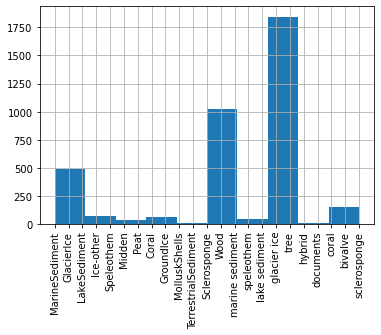

In [58]:
master_table['archiveType'].hist(xrot=90)


<AxesSubplot:>

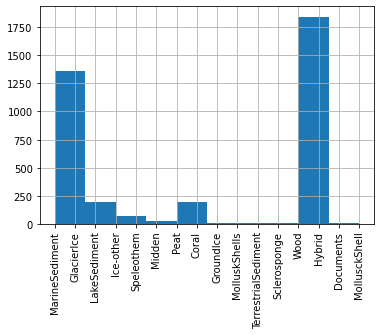

In [59]:
master_table['predicted archiveType'].hist(xrot=90)


<AxesSubplot:>

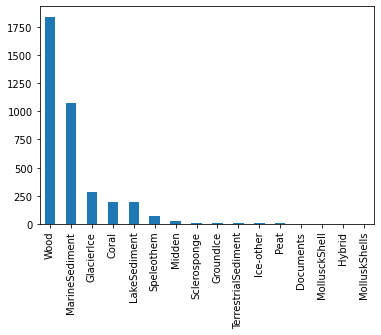

In [60]:
master_table['predicted archiveType'].value_counts().plot(kind='bar')

In [61]:
master_com = master_table_flagged_tsid.explode('TSid').explode('Dataset Name').explode('Compilation Name').explode('variableName').explode('Conflict with').reset_index()
# master_table_flagged_tsid = master_table_flagged_tsid.drop(columns=['index'])
master_table_flagged_tsid.to_csv(r'D:\\annotating_paleoclimate_data\\master_flagged.csv', sep = ',', encoding = 'utf-8',index = False)

In [62]:
table_com=master_table.explode('compilation name').explode('dataset name').explode('archiveType').explode('variableName').explode('proxyObservationType').explode('final proxyValue').explode('proxyValue from').explode('units').explode('hasProxySystem').explode('ProxySystem.SensorType').explode('interpretation/variable').explode('interpretation/variableDetail').reset_index()
#     print(table_com)
table_com = table_com.drop(columns = ['index'])
table_com.to_csv(r'D:\\annotating_paleoclimate_data\\master_lipd.csv', sep = ',', encoding = 'utf-8',index = False)
# filter_flagged_dict = {k:v for k,v in flagged_lipd_file.items() if len(v) > 1}
# print('Flagged Files: {0}'.format(filter_flagged_dict))

In [63]:
table_com = master_table_inferred.explode('compilation name').explode('dataset name').explode('archiveType').explode('variableName').explode('inferred Var Type').explode('final Inf Var Type').explode('inf Var from').explode('units').explode('interpretation/variable').explode('interpretation/variableDetail').reset_index()
table_com = table_com.drop(columns = ['index'])
table_com.to_csv(r'D:\\annotating_paleoclimate_data\\master_lipd_inferred.csv', sep = ',', encoding = 'utf-8',index = False)

<AxesSubplot:>

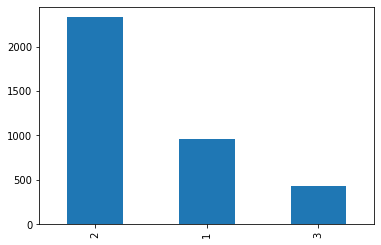

In [64]:
master_table['proxyValue from'].value_counts().plot(kind='bar')

In [65]:
import collections
counter_archive = collections.Counter(master_table['predicted archiveType'])
counter_archive

Counter({'MarineSediment': 1079,
         'GlacierIce': 283,
         'LakeSediment': 192,
         'Ice-other': 7,
         'Speleothem': 65,
         'Midden': 27,
         'Peat': 2,
         'Coral': 193,
         'GroundIce': 8,
         'MolluskShells': 1,
         'TerrestrialSediment': 8,
         'Sclerosponge': 10,
         'Wood': 1845,
         'Hybrid': 1,
         'Documents': 1,
         'MollusckShell': 1})

In [66]:
counter_proxy = collections.Counter(master_table['final proxyValue'])
counter_proxy

Counter({'d18O': 996,
         '37:2AlkenoneConcentration': 16,
         'Uk37': 36,
         'ice melt': 1,
         'dD': 92,
         'deuteriumExcess': 11,
         'Mg/Ca': 75,
         "Uk37'": 1,
         'd13C': 329,
         'RAN15': 1,
         'TOC': 40,
         'TN': 1,
         'Sulfur': 1,
         'C/N': 2,
         'D50': 1,
         'GrainSizeMode': 1,
         'DBD': 17,
         'CaCO3': 45,
         'TEX86': 5,
         'latitude sample': 9,
         'longitude sample': 9,
         'elevation sample': 9,
         'repeats': 1,
         'meltLayers': 1,
         'meltLayerFrequency': 1,
         'BIT': 3,
         'bubbleNumberDensity': 1,
         'bubbleNumberDensityError': 1,
         'brGDGT': 4,
         'brGDGTIIIa': 1,
         'brGDGTIIIb': 1,
         'brGDGTIia': 1,
         'brGDGTIib': 1,
         'brGDGTIa': 1,
         'brGDGTIb': 1,
         'MBT': 1,
         "MBT'": 1,
         'CBT': 1,
         'thisShouldntBeEmpty': 1,
         'thickness': 11,
 

In [26]:
counter_rem = collections.Counter(master_table['remainder(variableName)'])
counter_rem

Counter({'planktic.': 34,
         'NA': 2972,
         'nonReliable': 1,
         'benthic.': 377,
         'planktonic.': 337,
         'varve': 1,
         'sample': 1})